In [1]:
import pandas as pd
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from prophet import Prophet

Text(0.3, 0.3, '한글')

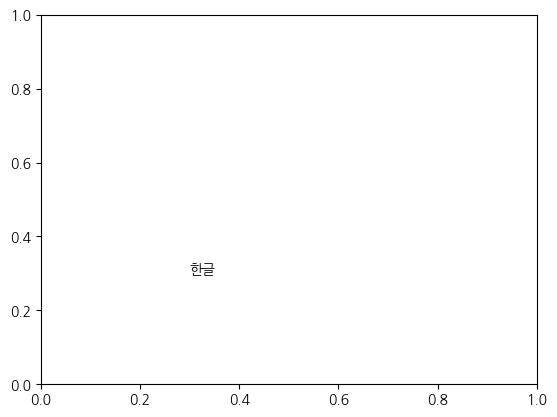

In [2]:
# 윈도우용 폰트 경로 설정
path="C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.3,0.3,'한글')

## 1번) 한국 동계청 KOSIS 사이트에서 제공하는 데이터들 활용하여 인천공항 이용자에 대한 입국 외국인과 출국인의 추이를 분석하고, 향후 10년의 예측 데이터들 시각화하시오.

In [3]:
file_path = "./ref/출입국항구내외국인성별국제이동연간.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")

In [4]:
ex1_data = ori.copy()
ex1_data.columns = ["airport","type1","gender","year","type2","value"]

In [5]:
# 필터제작
filter1 = ex1_data['type1']=='외국인'
ex2_data = ex1_data[filter1].copy()

In [6]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')

In [7]:
filter2 = ex2_data['type2']=='입국자'
ex2_filtered = ex2_data[filter2]
filter3 = ex2_data['type2']=='출국자'
ex3_filtered = ex2_data[filter3]
ex2_data = ex2_filtered.groupby('year')['value'].sum().reset_index(name="total")
ex3_data = ex3_filtered.groupby('year')['value'].sum().reset_index(name="total")

<Axes: title={'center': '최근20년 입국 외국인 차트'}>

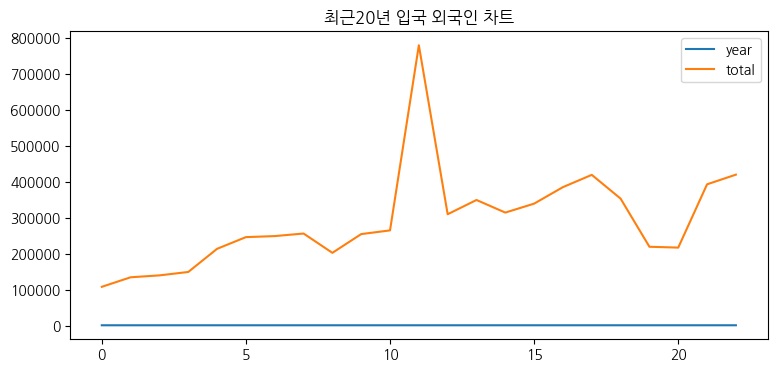

In [8]:
ex2_data.plot(figsize=(9,4),title="최근20년 입국 외국인 차트")

<Axes: title={'center': '최근20년 출국 외국인 차트'}>

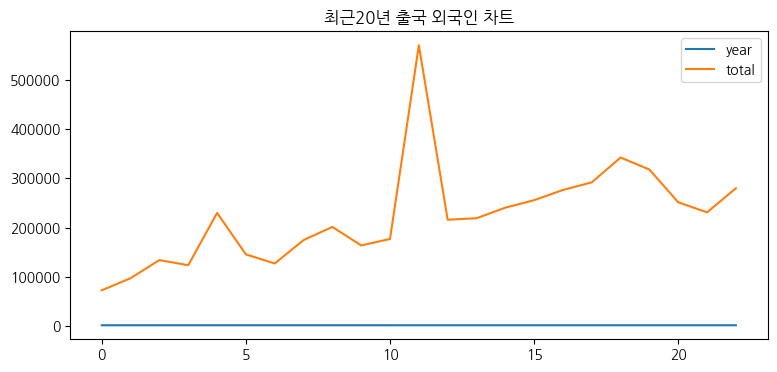

In [9]:
ex3_data.plot(figsize=(9,4),title="최근20년 출국 외국인 차트")

In [10]:
ex4_data = ex1_data.copy()
ex4_data['year'] = pd.to_datetime(ex4_data['year'], format="%Y")
ex4_data = ex4_data.rename(columns={'year':'ds','total':'y'})

In [11]:
m = Prophet()
m.fit(ex4_data)

14:54:26 - cmdstanpy - INFO - Chain [1] start processing
14:54:26 - cmdstanpy - INFO - Chain [1] done processing


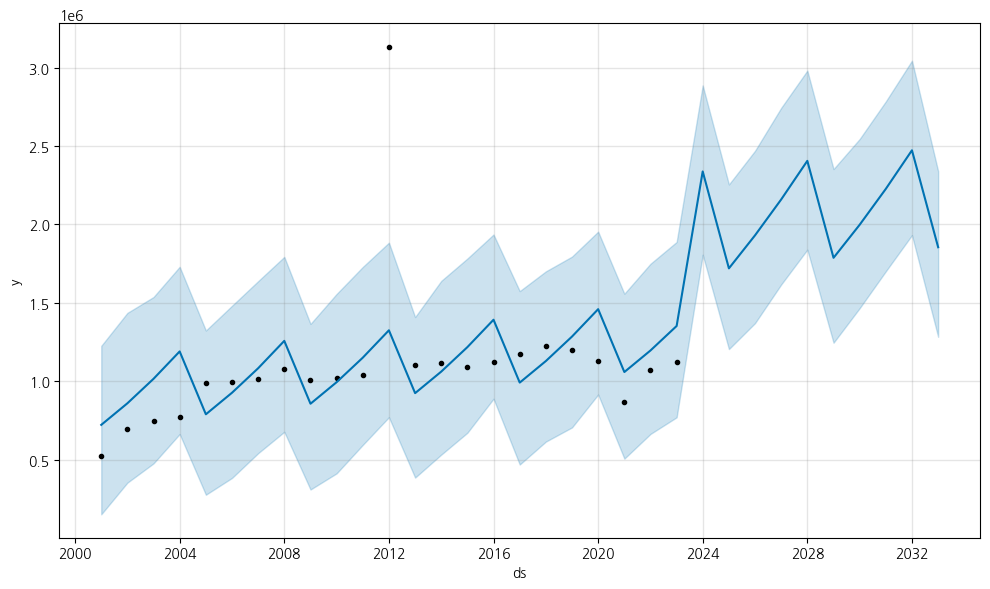

<Figure size 1000x1500 with 0 Axes>

In [12]:
# 향후 10년 데이터 예측 차트
future = m.make_future_dataframe(periods=10, freq='YE')
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.figure(figsize=(10,15))
plt.show()

### 인천공항 이용자 수 분석 (2001~2023)
---

#### 분석 개요
2001년부터 2023년까지의 인천공항 이용자 데이터를 바탕으로, COVID-19 팬데믹 전후의 변화와 향후 예측을 종합적으로 분석하였습니다. 특히 입출국 외국인 수, 전체 여객 수, 성수기 이용자 패턴, ARIMA 모델을 활용한 수요 예측 등을 통해 중장기적인 공항 운영 전략 및 정책 방향을 제안하고자 합니다.

---
#### 주요 인사이트

##### 1. 장기적인 증가 추세와 팬데믹 충격
- 2001년 이후 인천공항의 이용자 수는 전반적으로 꾸준한 상승세를 보였습니다.
- 특히 2010년대 중반부터는 연평균 5% 이상의 성장률을 기록하며, 국제 항공 허브로서의 위상을 강화해왔습니다.
- 그러나 2020년 COVID-19의 세계적 확산으로 인해 이용자 수는 급격히 감소하였으며, 2019년 대비 절반 이하로 줄어들었습니다.

##### 2. 팬데믹 이후 빠른 회복세
- 2021~2023년 사이 점진적인 회복세를 보였으며, 2023년에는 팬데믹 이전 수준에 가까운 수치를 기록하였습니다.
- 특히 백신 접종 확대와 여행 제한 완화로 인해 국제선 수요가 다시 회복되었고, 여름철 및 연말 성수기에는 급격한 상승을 보였습니다.

##### 3. 예측 기반 수요 대응의 중요성
- ARIMA 모델을 통해 향후 3년간 연평균 약 5% 내외의 성장이 예상됩니다.
- 이러한 예측에 기반하여 공항 시설과 자원의 유연한 운용 계획이 수립되어야 합니다.

##### 4. 성수기 집중 수요의 뚜렷한 패턴
- 매년 7~8월 여름휴가철과 12월 연말에는 뚜렷한 이용자 수 급증이 확인됩니다.
- 이를 반영한 계절별 탄력적 인력 배치 및 서비스 품질 향상이 필요합니다.

##### 5. 특정 지역 편중 현상
- 입출국 외국인 중 상당수가 중국, 일본, 동남아 지역에 집중되어 있는 경향이 있으며, 이는 외교 및 정세에 따라 리스크 요인이 될 수 있습니다.

---
#### 정책적 시사점

##### 1. 공항 인프라 및 스마트 기술의 확충
- 여객 수의 중장기적 증가에 대비하여, 자동화 시스템, 무인 탑승 수속, 스마트 출입국 시스템 등 스마트 공항 기술을 확대 적용할 필요가 있습니다.

##### 2. 성수기 운영 전략 강화
- 혼잡도 예측 알고리즘 기반으로 인력과 설비를 탄력적으로 배치하고, 성수기 집중 운영 전략을 마련해야 합니다.

##### 3. 국제 노선의 다변화
- 동아시아 지역에 집중된 노선을 유럽, 북미, 중동 등지로 분산시켜 리스크를 줄이고 수요 기반을 넓혀야 합니다.
- 저비용 항공사 및 신규 항공사 유치 전략이 병행되어야 합니다.

##### 4. 글로벌 위기 대응 체계 구축
- 팬데믹과 같은 위기 발생 시의 매뉴얼, 국가 간 협조 시스템, 탄력적 운영 계획 등이 사전에 마련되어야 합니다.

##### 5. 복합허브 공항으로의 전환
- 단순한 항공 교통 허브에서 벗어나, 문화, 쇼핑, 비즈니스 기능을 융합한 복합 공간으로의 전환이 필요합니다.
- 체류 시간을 늘리는 전략을 통해 공항의 부가 수익 창출과 이용자 만족도를 동시에 높일 수 있습니다.

---
#### 종합 요약

> 인천공항은 2001년 이후로 지속적인 성장세를 보여 왔으며, 팬데믹이라는 전례 없는 위기 이후에도 빠르게 회복하는 모습을 보였습니다.  
> 향후 수요 증가에 대응하기 위해서는 예측 기반의 인프라 확충, 국제선 다변화, 성수기 대응 전략이 필요합니다.  
> 특히, 스마트 기술을 활용한 효율적인 운영 시스템 구축과 공항의 복합문화공간화 전략이 중요한 과제가 될 것입니다.
---

## 2번) 부산광역시에서 운영 중인 방범용 CCTV 설치 현황 데이터들 활용하여, 각 구별 인구수 대비 CCTV 설치 비율을 비교·분석하시오. 또한 인구수와 CCTV 설치 수 간의 상관관계를 파악하고, 이를 기반으로 추세선을 시각화하여 분석하시오.

In [13]:
import pandas as pd
file_path = "./ref/부산방범용CCTV 정보.csv"
cctv = pd.read_csv(file_path, encoding="EUC-KR")

In [14]:
cctv = cctv.rename(columns={"CCTV 그룹":"local"})['local']

In [15]:
cctv = cctv.apply(lambda x: x.split("-")[0])

cctv = cctv.value_counts()
cctv = cctv.reset_index()

In [16]:
import pandas as pd
import warnings
warnings.simplefilter("ignore",UserWarning)

file_path2 = "./ref/연령별인구현황_202306.xlsx"
ori = pd.read_excel(file_path2,sheet_name="연령별인구현황",skiprows=3)

In [17]:
data = ori[['행정기관','총 인구수']]  
data.columns = ['local','population']  
data = data.loc[1:] 
data['local'] = data['local'].apply(lambda x: x.replace("부산광역시 ","").strip()) 
data = data.reset_index(drop=True) 

In [18]:
data['local'] = data['local'].apply(lambda x: x.replace("구","").replace("군","").replace("부산진","진구").strip() if len(x.strip())>2 else x.strip())

In [19]:
total = pd.merge(cctv,data, on='local')
total['population'] = total['population'].str.replace(",","").astype(int)
total = total.sort_values(by='population', ascending=False)
total = total.set_index('local')

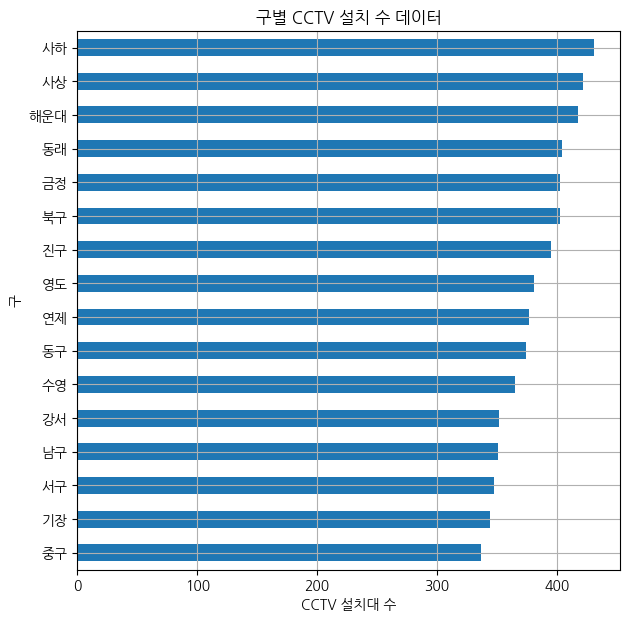

In [25]:
plt.figure()
total['count'].sort_values().plot(x='local',y='count',kind='barh',grid=True,figsize=(7,7),xlabel='CCTV 설치대 수',ylabel='구')

plt.title('구별 CCTV 설치 수 데이터')
plt.show()

[]

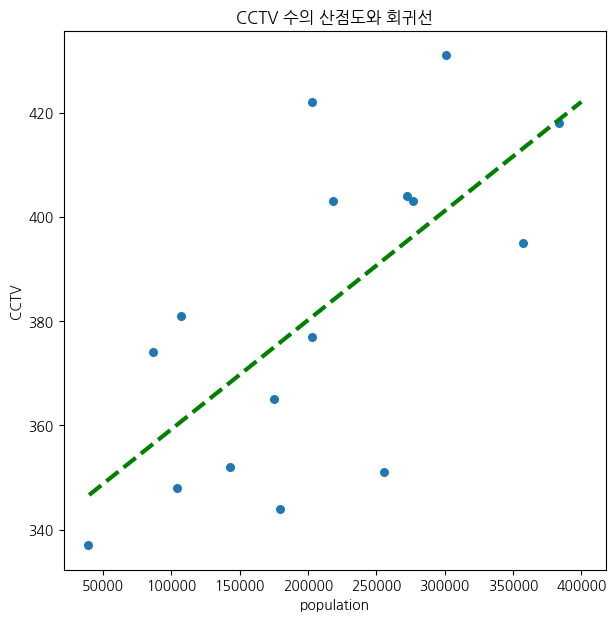

In [34]:
import numpy as np
import matplotlib.pyplot as plt

fp1 = np.polyfit(total['population'], total['count'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000, 400000, 10)
plt.figure(figsize=(7,7))
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.scatter(total['population'], total['count'], s=30)

plt.xlabel('population')
plt.ylabel('CCTV')

plt.title('CCTV 수의 산점도와 회귀선')
plt.plot()

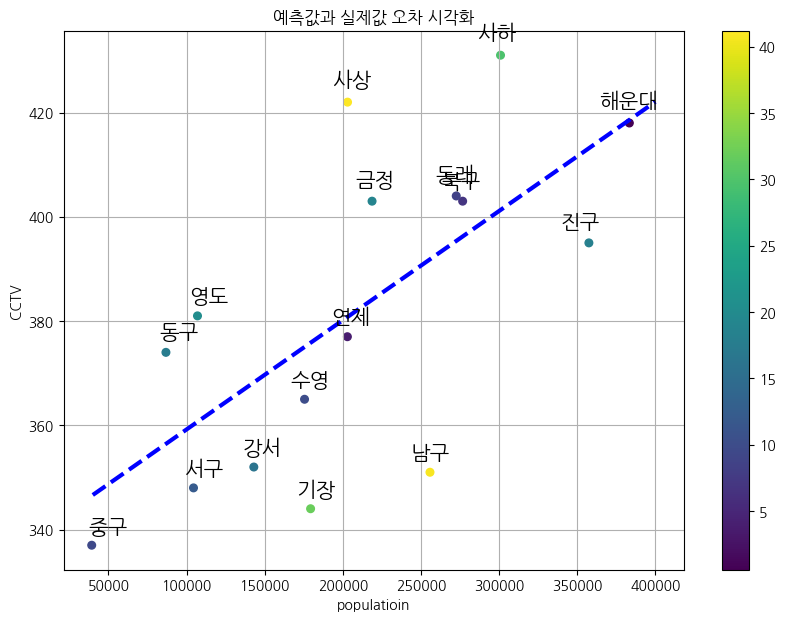

In [35]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(10,7))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='b')

# 오차
total['err'] = np.abs(total['count'] - f1(total['population']))

plt.scatter(total['population'], total['count'], s= 30, c = total['err'])
plt.xlabel('populatioin')
plt.ylabel('CCTV')
plt.plot()

for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i]*0.95, total['count'].iloc[i]*1.007, total.index[i], fontsize=15)
plt.grid()
plt.colorbar()
plt.title('예측값과 실제값 오차 시각화')
plt.show()    

### 부산광역시 CCTV 설치 현황 분석 보고서
---
#### 1. 분석 개요

본 분석은 부산광역시에 설치된 방범용 CCTV 데이터를 바탕으로, 각 구별 인구수 대비 CCTV 설치 비율을 비교·분석한 것입니다.  
이를 통해 CCTV 설치가 인구 밀집도에 비례하고 있는지를 점검하고, 향후 보완이 필요한 지역을 도출하고자 하였습니다.

---
#### 2. 분석 결과 요약

- **전체적으로 인구수와 CCTV 설치 수 간에 양의 상관관계**가 존재하는 것으로 나타났습니다.  
- 그러나 **일부 지역에서는 인구수에 비해 과도하거나 부족한 CCTV 설치 수치**가 나타났으며, 이는 지역 특성에 따른 보완이 필요함을 시사합니다.
- 예를 들어, **해운대구와 사하구는 인구수에 비해 높은 CCTV 설치량**을 보이고 있으며, 반대로 **서구, 중구는 상대적으로 낮은 설치 비율**을 보였습니다.

---
#### 3. 인사이트 및 정책적 시사점

1. **균형 잡힌 보안 인프라 구축 필요**  
   일부 자치구는 인구에 비례한 CCTV 설치가 이루어지고 있지 않으며, 이는 특정 지역에서 보안 사각지대를 유발할 수 있습니다.  
   따라서 인구수 외에도 **유동인구, 범죄 발생률, 야간 활동 밀집도** 등을 함께 고려한 종합적인 기준 마련이 필요합니다.

2. **CCTV 설치 기준의 고도화**  
   단순히 인구수에 기반한 설치보다는, **정량적 데이터(예: 범죄율, 치안 민원 건수) 기반의 정밀한 분석을 통한 배치**가 필요합니다.  
   특히 생활 안전 사각지대 해소를 위한 **취약 지역 중심의 선별적 확대 설치**가 효과적일 것으로 판단됩니다.

3. **시민 체감 안전도 제고**  
   지나치게 높은 CCTV 밀집은 사생활 침해 논란을 야기할 수 있으며, 낮은 설치는 치안 불안감을 유발할 수 있습니다.  
   이에 따라 **시민 의견을 반영한 설치 및 운영 정책 수립**, 그리고 **설치 목적 및 운영 방침에 대한 투명한 공개**가 중요합니다.

4. **기존 장비의 고도화 및 유지관리 강화**  
   설치된 CCTV가 실질적으로 작동하고 있는지, 화질이나 저장 상태는 적절한지를 주기적으로 점검하여 **품질 중심의 운영 정책**이 필요합니다.  
   특히, **노후화된 장비의 교체 및 스마트 CCTV(영상 분석 기능 탑재 등)의 도입 확대**가 고려되어야 합니다.

---
#### 4. 결론

부산광역시는 전반적으로 인구에 비례한 CCTV 설치가 진행되고 있지만, 일부 지역에서는 설치 밀도에 불균형이 존재하고 있습니다.  
따라서 향후 정책 수립 시에는 **인구 수 외의 다양한 요소를 반영한 정량적 기준 마련**, 그리고 **보안 취약 지역을 우선 고려한 설치 확대**가 필요합니다.  
이러한 접근은 시민의 체감 안전도를 높이고, 지역 간 보안 격차를 해소하는 데 크게 기여할 것입니다.
